In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("data/gaze_positions.csv")

In [4]:
data.head()

,timestamp,index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,eye_center0_3d_z,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z
0,2068.225736,0,0.650270,0.448057,0.264802,2068.225736-0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2068.234136,0,0.742758,0.448100,0.266096,2068.234136-0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2068.242536,0,0.718833,0.448159,0.267916,2068.242536-0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2068.250936,0,0.580725,0.448509,0.269176,2068.250936-0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2068.259336,0,0.621873,0.448495,0.270936,2068.259336-0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
core = data[["timestamp", "confidence", "norm_pos_x", "norm_pos_y"]]

In [6]:
core.head()

,timestamp,confidence,norm_pos_x,norm_pos_y
0,2068.225736,0.650270,0.448057,0.264802
1,2068.234136,0.742758,0.448100,0.266096
2,2068.242536,0.718833,0.448159,0.267916
3,2068.250936,0.580725,0.448509,0.269176
4,2068.259336,0.621873,0.448495,0.270936


In [7]:
from matplotlib import pyplot as plt
%matplotlib notebook

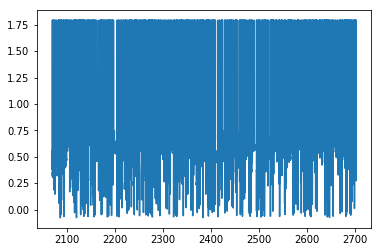

In [8]:
plt.figure()
plt.plot(data["timestamp"], data["norm_pos_x"])
plt.show()

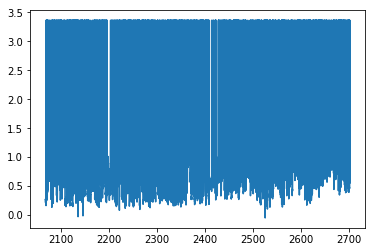

In [9]:
plt.figure()
plt.plot(data["timestamp"], data["norm_pos_y"])
plt.show()

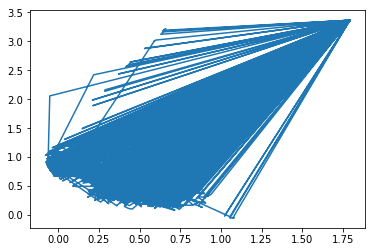

In [10]:
plt.figure()
plt.plot(data["norm_pos_x"], data["norm_pos_y"])
plt.show()

In [11]:
from mpl_toolkits import mplot3d

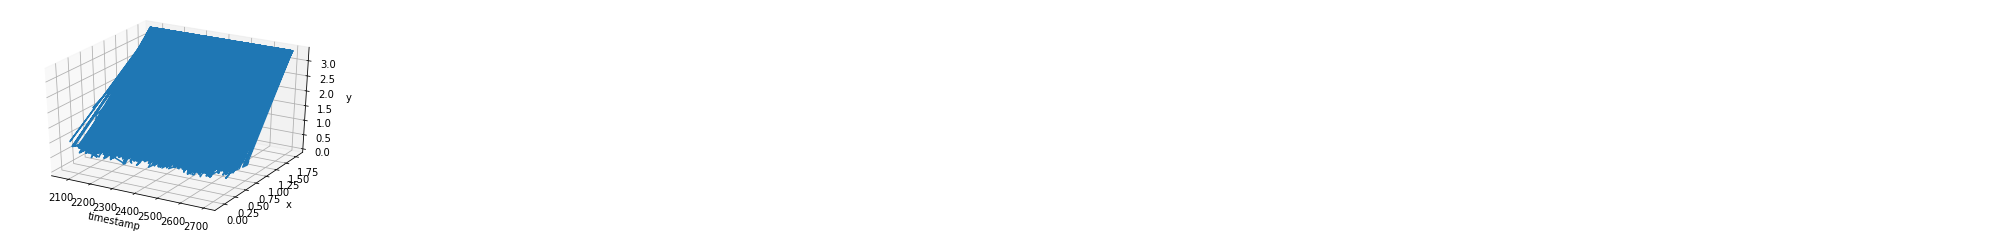

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(data["timestamp"], data["norm_pos_x"], data["norm_pos_y"])
ax.set_xlabel('timestamp')
ax.set_ylabel('x')
ax.set_zlabel('y');
plt.show()

In [13]:
from pykalman import KalmanFilter

In [14]:
kf = KalmanFilter(initial_state_mean=0.5, n_dim_obs=2)

In [15]:
xy = data[["norm_pos_x", "norm_pos_y"]].values

In [16]:
xy[1:10]

array([[0.44809971, 0.26609635],
       [0.448159  , 0.26791572],
       [0.44850883, 0.26917641],
       [0.44849496, 0.27093639],
       [0.44827076, 0.27285433],
       [0.44840316, 0.27538407],
       [0.44839952, 0.27528453],
       [0.44818918, 0.27641514],
       [0.38839063, 0.2171922 ]])

In [17]:
kf = KalmanFilter(initial_state_mean=[1,1.5],n_dim_obs=2)
output = kf.em(xy[:1000]).smooth(xy[:1000])

In [18]:
xy_new = output[0]
x = xy_new[:,0]
y = xy_new[:,1]

In [19]:
ts = data["timestamp"].values[:1000]

In [20]:
ts.shape

(1000,)

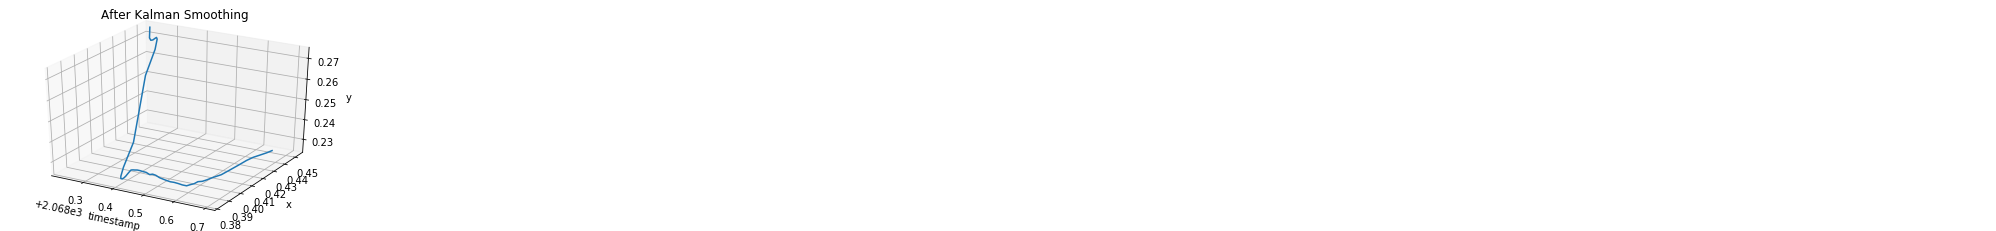

<Figure size 432x288 with 0 Axes>

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot3D(ts[0:50],x[0:50],y[0:50])
# ax.plot3D(ts[0:50],data["norm_pos_x"][0:50], data["norm_pos_y"][0:50])
ax.set_xlabel('timestamp')
ax.set_ylabel('x')
ax.set_zlabel('y');
# ax.set_title("Observed Values")
ax.set_title("After Kalman Smoothing")
plt.show()
plt.savefig("kalman.png")

In [27]:
from numpy.linalg import inv

def tracker_4dof(noise=0.02, time=1.0):
    from filterpy.kalman import KalmanFilter
    q = noise
    dt = time
    tracker = KalmanFilter(dim_x=8, dim_z=2)
    tracker.x = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    tracker.F = np.array([[1., 0., dt, 0., 1 / 2 * (dt ** 2), 0., 1 / 6 * (dt ** 3), 0],
                          [0., 1., 0., dt, 0., 1 / 2 * (dt ** 2), 0., 1 / 6 * (dt ** 3)],
                          [0., 0., 1., 0., dt, 0., 1 / 2 * (dt ** 2), 0],
                          [0., 0., 0., 1., 0, dt, 0., 1 / 2 * (dt ** 2)],
                          [0., 0., 0., 0., 1., 0., dt, 0.],
                          [0., 0., 0., 0., 0, 1., 0., dt],
                          [0., 0., 0., 0., 0, 0., 1., 0.],
                          [0., 0., 0., 0., 0, 0., 0., 1.]])
    tracker.H = np.array([[1., 0., 0., 0., 0., 0., 0., 0.],
                          [0., 1., 0., 0., 0., 0., 0., 0.],])
    tracker.R = np.array([[1.0, 0],
                          [0, 1.0]])
    tracker.P = np.eye(8) * 1000.
    tracker.Q = np.array([[0., 0., q, 0., q, 0., q, 0.],
                          [0., 0., 0., q, 0., q, 0., q],
                          [q, 0., q, 0., q, 0., q, 0.],
                          [0., q, 0., q, 0., q, 0., q],
                          [q, 0., q, 0., q, 0., q, 0.],
                          [0., q, 0., q, 0., q, 0., q],
                          [q, 0., q, 0., q, 0., q, 0.],
                          [0., q, 0., q, 0., q, 0., q]])
    return tracker

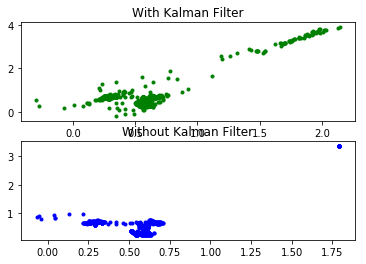

In [28]:
x = np.array(data['norm_pos_x'])
y = np.array(data['norm_pos_y'])


skip = 10000
step = 1000
KF_2D = tracker_4dof()
preds = []
measure = []
z = np.array([x[skip], y[skip]])
count = [_ for _ in range(step)]
eps_max = 0.6
scale = 10
dumb = 0
old_Q = KF_2D.Q
for _ in range(skip, skip+step):

    KF_2D.predict()
    KF_2D.update(z)
    preds.append([KF_2D.x[0], KF_2D.x[1]])
    measure.append([z[0], z[1]])
    z = np.array([x[_], y[_]])
    # res_x.append(KF_2D.y[0])
    # res_y.append(KF_2D.y[1])
    res = KF_2D.y
    S = KF_2D.S
    eps = np.dot(res.T, inv(S)).dot(res)
    if eps > eps_max:
        KF_2D.Q = old_Q*scale
        dumb += 1
    elif dumb > 0:
        KF_2D.Q = old_Q
        dumb = dumb - 1

plt.subplot(2,1,1)
# plt.xlim(0,1280)
# plt.ylim(0,720)
plt.title('With Kalman Filter')
plt.scatter([preds[_][0] for _ in range(len(preds))], [preds[_][1] for _ in range(len(preds))], color='green', marker='.')


plt.subplot(2,1,2)
# plt.xlim(0,1280)
# plt.ylim(0,720)
plt.title('Without Kalman Filter')
plt.scatter([measure[_][0] for _ in range(len(preds))], [measure[_][1] for _ in range(len(preds))], color='blue', marker='.')

plt.show()